<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_017_hypothesis_testing_penguins_mean_body_masses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Penguin Body Mass Analysis by Island: Summary**

---

#### **Objective**
To determine whether the mean body masses of penguins differ significantly across the three islands: **Biscoe**, **Dream**, and **Torgersen**.

---

#### **Key Steps and Results**
1. **Variance Testing**:
   - **Test**: Levene’s Test for Equality of Variances.
   - **Result**: \(p = 0.0000\), indicating variances differ significantly between islands.
   - **Conclusion**: Proceeded with **Welch’s ANOVA**, which is robust to unequal variances.

2. **Mean Comparison**:
   - **Test**: Welch’s ANOVA.
   - **Result**: \(F = 102.37, p = 0.0000\), with a large effect size (\(\eta^2 = 0.39\)).
   - **Conclusion**: At least one island has a mean body mass significantly different from the others.

3. **Post-Hoc Analysis**:
   - **Test**: Games-Howell Post-Hoc Test for pairwise comparisons.
   - **Results**:
     - **Biscoe vs. Dream**: Significant (\(p < 0.05\)), with a mean difference of \(+1000.27\) grams.
     - **Biscoe vs. Torgersen**: Significant (\(p < 0.05\)), with a mean difference of \(+1010.66\) grams.
     - **Dream vs. Torgersen**: Not significant (\(p = 0.9897\)), with a negligible mean difference of \(+10.39\) grams.
   - **Effect Sizes**:
     - Large effects between **Biscoe** and the other two islands (\(Hedges' g = 1.52\) and \(1.38\)).
     - Minimal effect between **Dream** and **Torgersen** (\(Hedges' g = 0.02\)).

4. **Visualizations**:
   - **KDE Plots**: Show clear separation between **Biscoe** and the other two islands, with **Dream** and **Torgersen** exhibiting overlapping distributions.
   - **Barplot**: Highlights the magnitude of pairwise mean differences from the Games-Howell test.

---

#### **Conclusions**
1. The mean body masses of penguins differ significantly across the three islands.
2. **Biscoe** penguins are significantly heavier than those from both **Dream** and **Torgersen**, while there is no meaningful difference between **Dream** and **Torgersen** penguins.
3. Variances in body mass were unequal across islands, underscoring the importance of using Welch’s ANOVA and robust post-hoc methods like Games-Howell.

---

#### **Next Steps**
1. Explore potential biological or environmental factors that may explain the observed differences in body mass (e.g., food availability, habitat conditions).
2. Extend the analysis to other features (e.g., flipper length, bill depth) to investigate additional inter-island differences.



### **Step 1: Load and Explore the Dataset**

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Penguins dataset
penguins = sns.load_dataset("penguins").dropna()

# Convert object columns to categorical
categorical_columns = ['species', 'island', 'sex']
penguins[categorical_columns] = penguins[categorical_columns].astype('category')

# Verify the changes
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.4 KB


#### Categorical Distribution Visualization

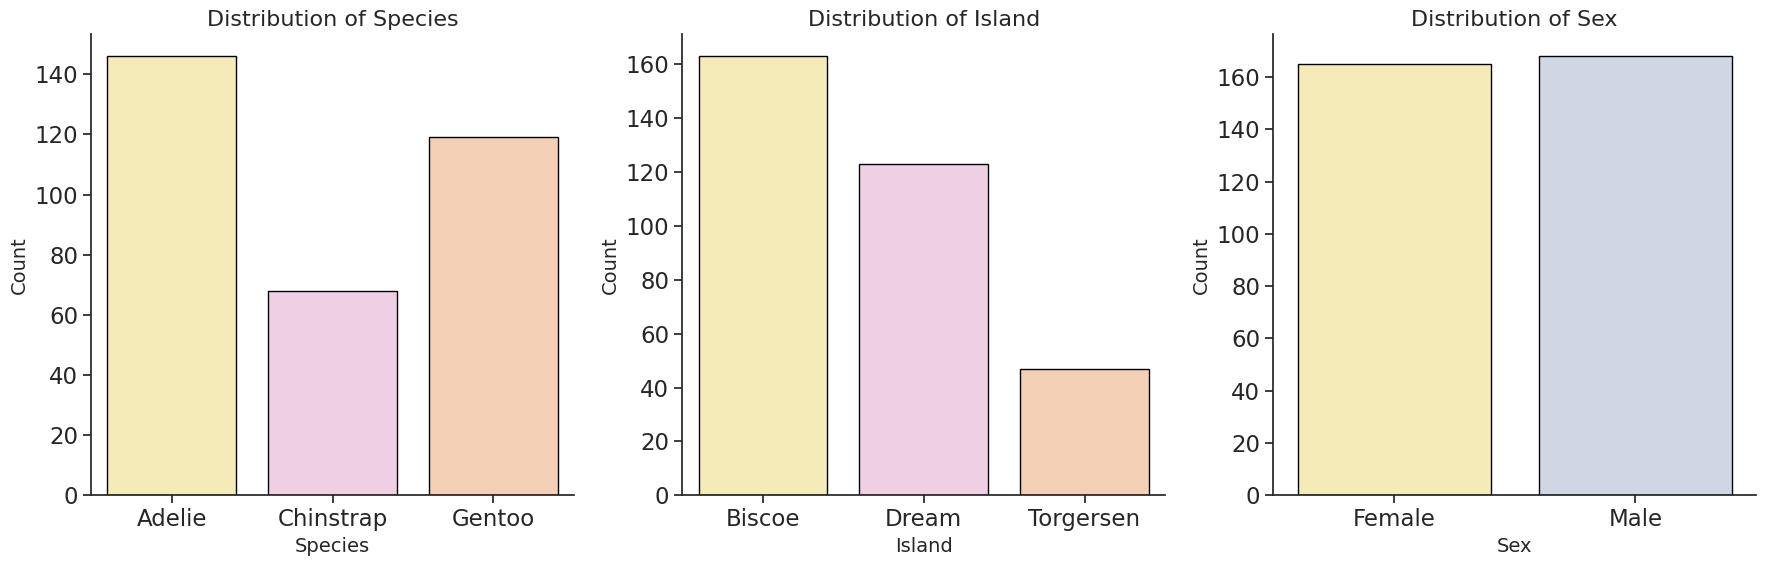

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme, style, and palette
theme_style = "ticks"
palette_name = "Pastel2_r"
context_scale = "notebook"

sns.set_theme(style=theme_style, palette=palette_name)
sns.set_context(context_scale, font_scale=1.5, rc={"lines.linewidth": 2.5})

# Define categorical columns
categorical_columns = ['species', 'island', 'sex']

# Create a 1x3 grid of barplots
plt.figure(figsize=(18, 6))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=penguins, x=column, hue=column, palette=palette_name, edgecolor="black")
    plt.title(f"Distribution of {column.capitalize()}", fontsize=16)
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.ylabel("Count", fontsize=14)
    sns.despine()

plt.tight_layout()
plt.show()



#### Numeric Distribution Visualization

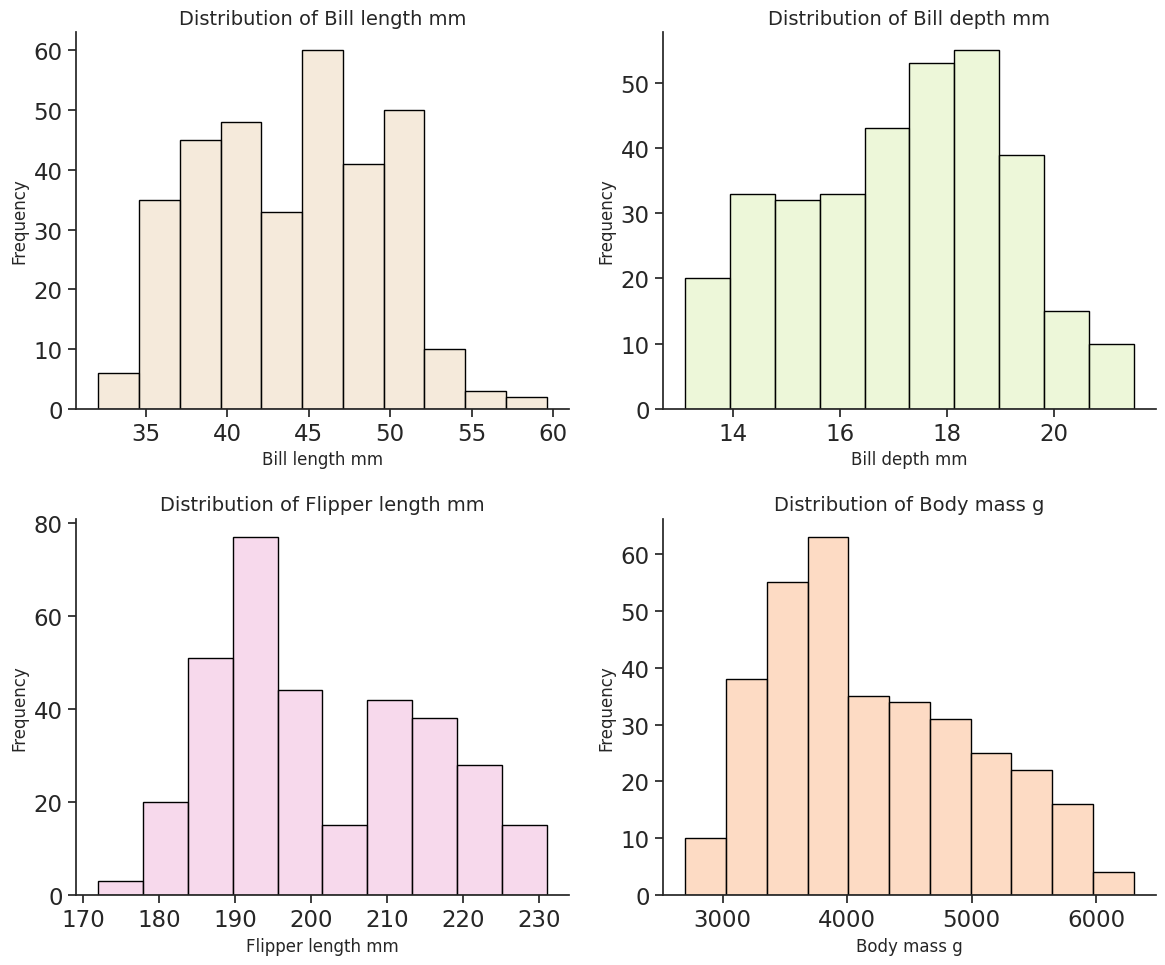

In [ ]:
# Numeric columns in the dataset
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Plot overall distributions for each numeric feature
plt.figure(figsize=(12, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(
        data=penguins,
        x=column,
        kde=False,  # Add KDE to show the density
        color=sns.color_palette(palette_name, n_colors=4)[i - 1],
        edgecolor="black",
        alpha=0.7
    )
    plt.title(f"Distribution of {column.replace('_', ' ').capitalize()}", fontsize=14)
    plt.xlabel(column.replace('_', ' ').capitalize(), fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    sns.despine()

plt.tight_layout()
plt.show()


### **Step 2: Identify Possible Research Questions**
Based on the dataset's structure, we’ll explore comparisons such as:
1. **Flipper Length by Species**:
   - Do the mean flipper lengths differ significantly between the three species?
2. **Body Mass by Island**:
   - Do the mean body masses differ significantly across islands?
3. **Bill Length by Sex**:
   - Does the mean bill length differ significantly between male and female penguins?



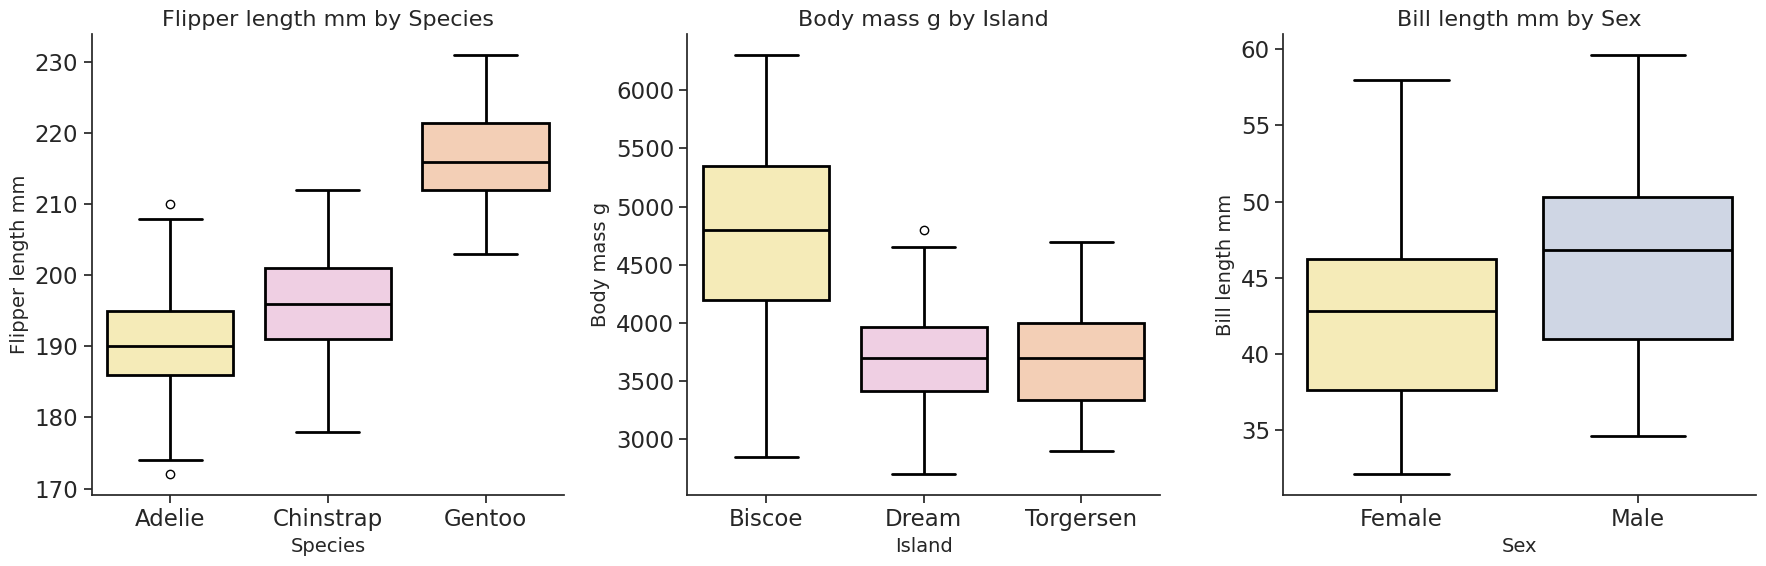

In [ ]:
# Numeric-Categorical pairs for visualization
visualizations = [
    ('flipper_length_mm', 'species'),
    ('body_mass_g', 'island'),
    ('bill_length_mm', 'sex')
]

# Create a 1x3 grid of boxplots
plt.figure(figsize=(18, 6))

for i, (numeric, categorical) in enumerate(visualizations, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(
        data=penguins,
        x=categorical,
        y=numeric,
        hue=categorical,
        palette=palette_name,
        linecolor="k", linewidth=2,
        showfliers=True,  # Display outliers for additional insights
    )
    plt.title(f"{numeric.replace('_', ' ').capitalize()} by {categorical.capitalize()}", fontsize=16)
    plt.xlabel(categorical.capitalize(), fontsize=14)
    plt.ylabel(numeric.replace('_', ' ').capitalize(), fontsize=14)
    sns.despine()

plt.tight_layout()
plt.show()


### **Hypothesis for Body Mass by Island**

#### **Question**
Do the mean body masses of penguins differ significantly across the three islands in the dataset: **Biscoe**, **Dream**, and **Torgersen**?

#### **Hypotheses**
- **Null Hypothesis (\(H_0\))**: The variances of body mass are equal across the three islands.
- **Alternative Hypothesis (\(H_1\))**: At least one island has a variance in body mass that differs significantly from the others.

---

### **Test Variance (Levene's Test)**

We’ll use **Levene’s test** to check for equality of variances across groups:

---

### **Next Steps**
1. **Interpret Variance Results**:
   - If variances are **equal** (\(p > 0.05\)), proceed with a standard **One-Way ANOVA**.
   - If variances are **unequal** (\(p \leq 0.05\)), proceed with **Welch’s ANOVA**.

2. **Visualize Distributions**:
   - Use a boxplot or KDE to inspect body mass by island before testing means.


In [2]:
from scipy.stats import levene

# Extract body mass data for each island
biscoe_body_mass = penguins[penguins['island'] == 'Biscoe']['body_mass_g']
dream_body_mass = penguins[penguins['island'] == 'Dream']['body_mass_g']
torgersen_body_mass = penguins[penguins['island'] == 'Torgersen']['body_mass_g']

# Perform Levene's Test
stat, p_value = levene(biscoe_body_mass, dream_body_mass, torgersen_body_mass)

# Output results
print("Levene's Test for Equality of Variances:")
print(f"Test Statistic: {stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. Variances differ significantly between groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in variances between groups.")

Levene's Test for Equality of Variances:
Test Statistic: 25.97
P-Value: 0.0000
Conclusion: Reject the null hypothesis. Variances differ significantly between groups.


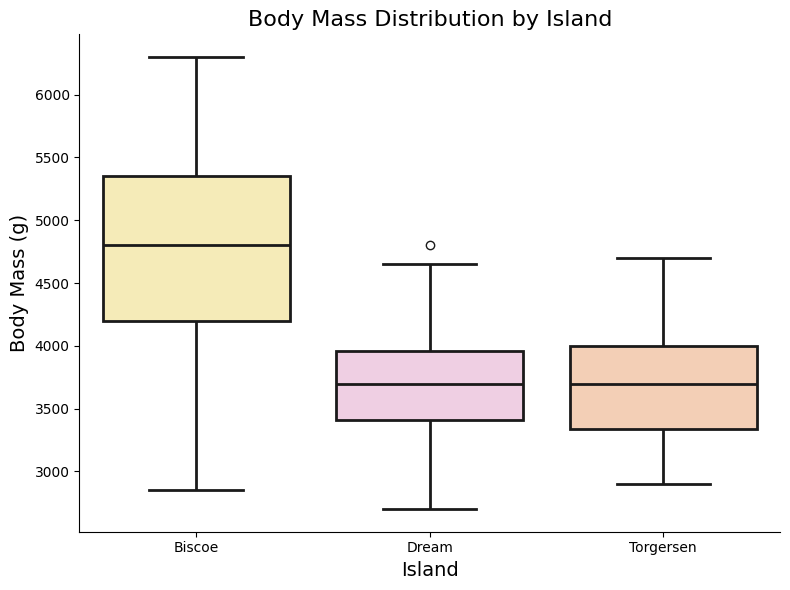

In [10]:
# Visualization: Boxplot for body mass by island
plt.figure(figsize=(8, 6))
sns.boxplot(data=penguins, x='island', y='body_mass_g', hue='island', palette="Pastel2_r", linecolor="0.1", linewidth=2)
plt.title("Body Mass Distribution by Island", fontsize=16)
plt.xlabel("Island", fontsize=14)
plt.ylabel("Body Mass (g)", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()

### **Interpretation of Levene's Test Results**

---

#### **Results**
- **Test Statistic**: \(25.97\)
- **P-Value**: \(0.0000\) (significant at \(\alpha = 0.05\)).

#### **Conclusion**
- The p-value is far below the significance threshold (\(p < 0.05\)), so we **reject the null hypothesis**.
- This indicates that the variances of body mass differ significantly across the three islands (**Biscoe**, **Dream**, and **Torgersen**).

---

### **Next Steps**

1. **Use Welch’s ANOVA**:
   - Since the variances are unequal, we cannot use standard One-Way ANOVA (which assumes equal variances).
   - Proceed with **Welch’s ANOVA**, which is robust to unequal variances, to test whether the mean body masses differ significantly across the islands.

2. **Visualize the Data**:
   - Create a boxplot to inspect the body mass distributions across the islands.

---

### **When to Use Standard ANOVA**
1. **Equal Variances**:
   - If the variances across the groups are approximately equal (\(p > 0.05\) in Levene's test), the assumption of homogeneity of variances is satisfied.
   - In this case, a **standard One-Way ANOVA** is appropriate.

2. **Reason**:
   - Standard ANOVA assumes equal variances as part of its mathematical model, so violating this assumption can lead to incorrect results (e.g., inflated Type I error rates).

---

### **When to Use Welch’s ANOVA**
1. **Unequal Variances**:
   - If the variances across the groups differ significantly (\(p \leq 0.05\) in Levene's test), the assumption of homogeneity of variances is violated.
   - In this case, **Welch’s ANOVA** is the appropriate choice.

2. **Reason**:
   - Welch’s ANOVA adjusts for differences in variances and group sizes, providing more reliable results when variances are unequal.

---

### **Key Differences Between ANOVA and Welch’s ANOVA**
| Feature               | ANOVA                        | Welch’s ANOVA                |
|-----------------------|------------------------------|------------------------------|
| **Variance Assumption** | Assumes equal variances     | Does not assume equal variances |
| **Sample Sizes**       | Works well with equal sizes | Robust to unequal group sizes |
| **Applications**       | Standard for balanced designs | Better for unbalanced or heteroscedastic data |

---

### **How This Applies to Your Penguins Example**
1. **Levene’s Test Results**:
   - The test showed \(p = 0.0000\), so variances are not equal.
   - We reject the null hypothesis of equal variances.

2. **Choice of Test**:
   - Since variances differ significantly, **Welch’s ANOVA** is the correct choice to test whether the mean body masses differ across the three islands.

---

### **Summary Workflow**
1. **Start with Levene's Test**:
   - \(p > 0.05\): Variances are equal → Use **ANOVA**.
   - \(p \leq 0.05\): Variances are unequal → Use **Welch's ANOVA**.

2. **Follow Up with Post-Hoc Testing**:
   - If the ANOVA/Welch's ANOVA result is significant, use post-hoc tests (e.g., Tukey's HSD or Games-Howell) to determine which groups differ.


In [5]:
# !pip install pingouin

In [11]:
from pingouin import welch_anova
import seaborn as sns
import matplotlib.pyplot as plt

# Welch's ANOVA for mean body mass by island
welch_results = welch_anova(dv='body_mass_g', between='island', data=penguins)

# Output results
print("Welch's ANOVA Results:")
print(welch_results)

# Highlight important metrics
f_stat = welch_results['F'][0]
p_value = welch_results['p-unc'][0]
eta_squared = welch_results['np2'][0]

print("\nKey Metrics from Welch's ANOVA:")
print(f"F-Statistic: {f_stat:.2f} (indicates the ratio of between-group variance to within-group variance)")
print(f"P-Value: {p_value:.4f} (indicates the significance level; p < 0.05 suggests group means differ significantly)")
print(f"Eta-Squared (Effect Size): {eta_squared:.2f} (indicates the proportion of variance explained by group differences)")


Welch's ANOVA Results:
   Source  ddof1       ddof2           F         p-unc       np2
0  island      2  137.359162  102.372091  6.057642e-28  0.389022

Key Metrics from Welch's ANOVA:
F-Statistic: 102.37 (indicates the ratio of between-group variance to within-group variance)
P-Value: 0.0000 (indicates the significance level; p < 0.05 suggests group means differ significantly)
Eta-Squared (Effect Size): 0.39 (indicates the proportion of variance explained by group differences)


### **Interpretation of Welch’s ANOVA Results**

---

#### **Question**
Do the mean body masses differ significantly across the three islands: **Biscoe**, **Dream**, and **Torgersen**?

---

#### **Key Metrics and Interpretation**
1. **F-Statistic**: **102.37**
   - This large value indicates that the variance between the group means (islands) is significantly greater than the variance within the groups.
   - Suggests substantial differences in mean body mass among the islands.

2. **P-Value**: **0.0000** (\(p < 0.05\))
   - The p-value is far below the significance threshold (\(\alpha = 0.05\)).
   - This means we **reject the null hypothesis** and conclude that the mean body masses differ significantly across the islands.

3. **Eta-Squared (\(\eta^2\))**: **0.39**
   - Indicates that **39% of the total variance in body mass** is explained by differences between the islands.
   - According to effect size guidelines:
     - \(0.01\): Small
     - \(0.06\): Medium
     - \(0.14\): Large
   - This value (\(0.39\)) represents a **large effect size**, showing that island location strongly influences body mass.

---

#### **Conclusion**
The results of Welch’s ANOVA indicate that:
- **The mean body masses of penguins differ significantly across the islands.**
- Island differences account for a substantial proportion of the variation in body mass (\(39\%\)).

---

#### **Next Steps**
1. **Post-Hoc Testing**:
   - Conduct a **Games-Howell test** to identify which specific islands have significantly different mean body masses.
2. **Visualize Results**:
   - Use boxplots or other visualizations to highlight group differences.



### **Games-Howell post-hoc test**

---

### **What to Look For**
1. **Pairwise Comparisons**:
   - Identify which pairs of islands show significant differences in mean body mass (\(p < 0.05\)).
2. **Mean Differences**:
   - Quantify the size of the difference between groups.
3. **Effect Sizes**:
   - Use Hedges’ \(g\) to interpret the magnitude of the difference:
     - Small: \(0.2\)
     - Medium: \(0.5\)
     - Large: \(0.8\)


In [17]:
from pingouin import pairwise_gameshowell

# Perform Games-Howell post-hoc test
games_howell_results = pairwise_gameshowell(dv='body_mass_g', between='island', data=penguins)

# Output results
print("Games-Howell Post-Hoc Test Results:")
games_howell_results

Games-Howell Post-Hoc Test Results:


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Biscoe,Dream,4719.171779,3718.902439,1000.269340,72.273668,13.840025,255.855772,0.000000e+00,1.521319
1,Biscoe,Torgersen,4719.171779,3708.510638,1010.661141,90.449514,11.173760,133.567017,3.963496e-14,1.380261
2,Dream,Torgersen,3718.902439,3708.510638,10.391801,75.698389,0.137279,77.085309,9.896655e-01,0.024403


In [16]:
# Highlight key metrics
print("\nKey Metrics from Games-Howell Test:")
for _, row in games_howell_results.iterrows():
    print(f"Comparison: {row['A']} vs. {row['B']}")
    print(f"  Mean Difference: {row['diff']:.2f}")
    print(f"  P-Value: {row['pval']:.4f} {'(Significant)' if row['pval'] < 0.05 else '(Not Significant)'}")
    print(f"  Hedges’ g (Effect Size): {row['hedges']:.2f}")
    print("-" * 40)



Key Metrics from Games-Howell Test:
Comparison: Biscoe vs. Dream
  Mean Difference: 1000.27
  P-Value: 0.0000 (Significant)
  Hedges’ g (Effect Size): 1.52
----------------------------------------
Comparison: Biscoe vs. Torgersen
  Mean Difference: 1010.66
  P-Value: 0.0000 (Significant)
  Hedges’ g (Effect Size): 1.38
----------------------------------------
Comparison: Dream vs. Torgersen
  Mean Difference: 10.39
  P-Value: 0.9897 (Not Significant)
  Hedges’ g (Effect Size): 0.02
----------------------------------------


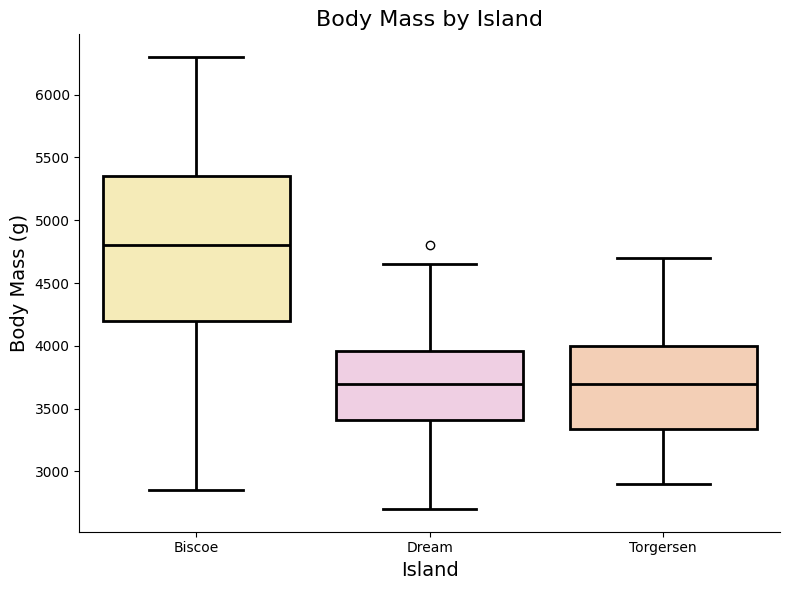

In [27]:
# Optional: Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=penguins, x='island', y='body_mass_g', hue='island', palette="Pastel2_r", linecolor='k', linewidth=2)
plt.title("Body Mass by Island", fontsize=16)
plt.xlabel("Island", fontsize=14)
plt.ylabel("Body Mass (g)", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()

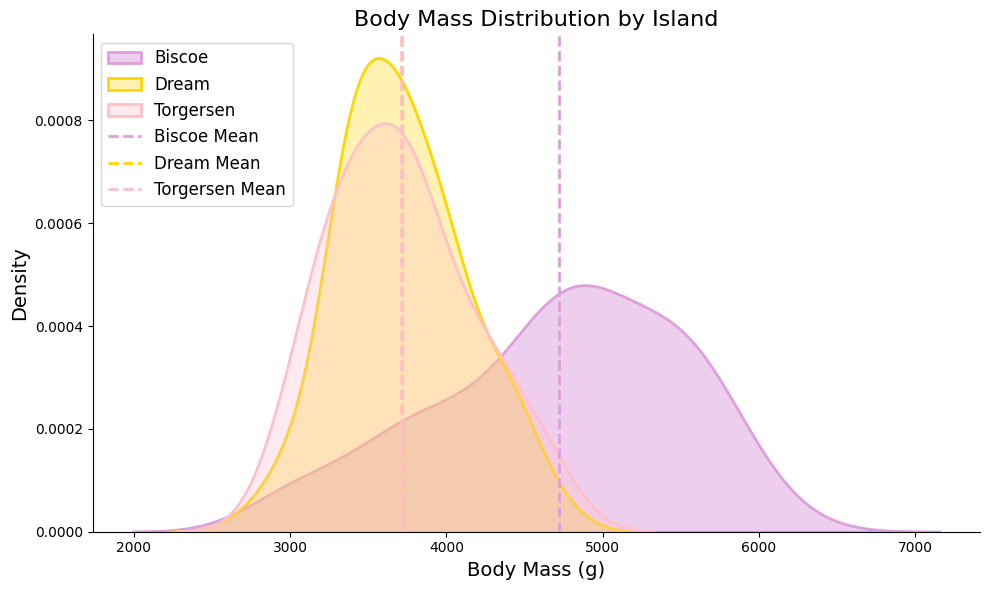

In [25]:
# Overlayed KDE plots for body mass by island
plt.figure(figsize=(10, 6))

# KDE plots for each island
sns.kdeplot(data=penguins[penguins['island'] == 'Biscoe']['body_mass_g'],
            fill=True, alpha=0.5, linewidth=2, label="Biscoe", color="plum")
sns.kdeplot(data=penguins[penguins['island'] == 'Dream']['body_mass_g'],
            fill=True, alpha=0.3, linewidth=2, label="Dream", color="gold")
sns.kdeplot(data=penguins[penguins['island'] == 'Torgersen']['body_mass_g'],
            fill=True, alpha=0.3, linewidth=2, label="Torgersen", color="pink")

# Add vertical lines for group means
plt.axvline(penguins[penguins['island'] == 'Biscoe']['body_mass_g'].mean(), color="plum", linestyle="--", linewidth=2, label="Biscoe Mean")
plt.axvline(penguins[penguins['island'] == 'Dream']['body_mass_g'].mean(), color="gold", linestyle="--", linewidth=2, label="Dream Mean")
plt.axvline(penguins[penguins['island'] == 'Torgersen']['body_mass_g'].mean(), color="pink", linestyle="--", linewidth=2, label="Torgersen Mean")

# Customize the plot
plt.title("Body Mass Distribution by Island", fontsize=16)
plt.xlabel("Body Mass (g)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(fontsize=12, loc="upper left")
sns.despine()
plt.tight_layout()
plt.show()


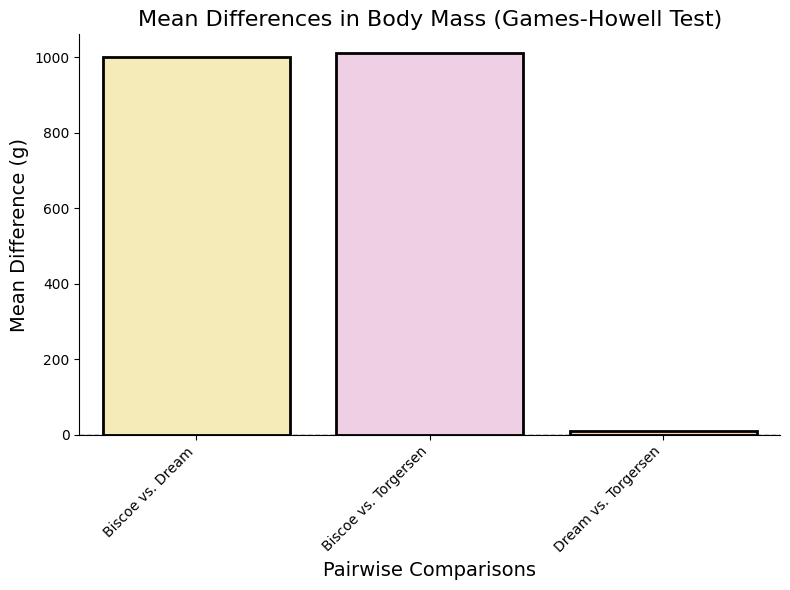

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation for visualization
games_howell_results['Comparison'] = games_howell_results['A'] + " vs. " + games_howell_results['B']

# Barplot of mean differences
plt.figure(figsize=(8, 6))
sns.barplot(data=games_howell_results, x='Comparison', y='diff', hue='Comparison', palette="Pastel2_r", edgecolor='k', linewidth=2)

# Add labels and customize the plot
plt.axhline(0, color='black', linestyle="--", linewidth=1)  # Reference line at zero
plt.title("Mean Differences in Body Mass (Games-Howell Test)", fontsize=16)
plt.xlabel("Pairwise Comparisons", fontsize=14)
plt.ylabel("Mean Difference (g)", fontsize=14)
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.tight_layout()
plt.show()
